In [152]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from abetter.test.two_inde_mean_t_test import mean_t_test_two_ind
from abetter.test.two_inde_mean_z_test import mean_z_test_two_ind
from abetter.test.two_inde_prop_z_test import prop_z_test_two_ind

def plot_mde_mean_sample(std1, std2, n_ratio=(20,80), n_min_range=(5,100), points=100, alpha_beta=((0.05,0.20), (0.05,0.10), (0.05,0.05)), test="t", equal_var=True): 
    color_list = ['#'+_ for _ in '03045e-023e8a-0077b6-0096c7-00b4d8-48cae4-90e0ef-ade8f4-caf0f8'.split('-')]
    ratio = max(n_ratio)/min(n_ratio)
    mde = []
    # 计算MDE ------------------------------------------------------------------------------------------------------------------------
    if test in ('t', 'T'):
        # t 检验
        for i in range(*n_min_range, max(1, np.floor((n_min_range[1]-n_min_range[0])/points).astype('int64'))): 
            n1, n2 = np.floor((i, i * ratio)).astype('int64')
            nn = {'n1': n1, 'n2': n2}
            mm = {f'mde_alpha_{a:.4f}_beta_{b:.4f}': mean_t_test_two_ind(
                n1=n1, mean1=1, std1=std1,
                n2=n2, mean2=2, std2=std2,
                alpha=a, beta=b, h0='==',
                equal_var=equal_var).get('mde')
                 for a, b in alpha_beta}
            mde.append( nn | mm)
    elif test in ('z', 'Z'):
        # Z 检验
        for i in range(*n_min_range, max(1, np.floor((n_min_range[1]-n_min_range[0])/points).astype('int64'))): 
            n1, n2 = np.floor((i, i * ratio)).astype('int64')
            nn = {'n1': n1, 'n2': n2}
            mm = {f'mde_alpha_{a:.4f}_beta_{b:.4f}': mean_z_test_two_ind(
                n1=n1, mean1=1, std1=std1,
                n2=n2, mean2=2, std2=std2,
                alpha=a, beta=b, h0='==').get('mde')
                 for a, b in alpha_beta}
            mde.append( nn | mm)
    else:
        raise ValueError("test 取值只有 z 和 t 两种")
    # 转为 DataFramea
    mde = pd.DataFrame(mde)
    # 绘图 ------------------------------------------------------------------------------------------------------------------------
    # 关闭输出
    with plt.ioff():
        # 绘制密度函数
        fig, ax = plt.subplots(figsize=(7, 5))
        # 遍历所有的 alpha_beta 组合
        alpha_beta = mde.columns[2:]
        axs = [ax.plot(mde.n1, mde[c], c=color_list[i%9], label=r'$\overline{X}_1$') for i, c in enumerate(alpha_beta)]
        ax.set_xlim(min(mde.n1), max(mde.n1))
        
        # 坐标刻度
        ax.grid()
        
        # 设置
        plt.title('MDE on the sample size of the smallest group', fontsize=12, fontweight='bold',  pad=20)
        sub_title = 'Z-Test' if test not in ('t', 'T') else f't-Test, {"Equal" if equal_var else "Unequal"} var'
        plt.text(
            0.5, 1,  # 位置（相对坐标，0.5是水平中心）
            sub_title,
            fontsize=10,
            ha='center',  # 水平居中
            va='bottom',
            transform=plt.gca().transAxes  # 使用轴坐标系统
        )
        alpha_beta = [_.replace('mde_alpha_', r'$\alpha$=').replace('_beta_', r', $\beta$=') for _ in alpha_beta]
        ax.legend([_[0] for _ in axs], alpha_beta)
        # 轴标签
        plt.xlabel("Sample Size of the smallest group")
        plt.ylabel("MDE")
        
    return fig, ax, mde

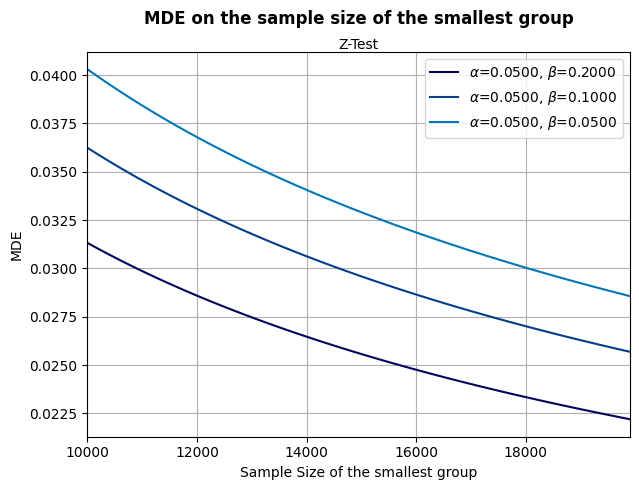

In [153]:
f, a, mde = plot_mde_mean_sample(std1=1, std2=1, n_ratio=(20,80), n_min_range=(10000,20000), test='z')
f

In [167]:
def plot_mde_prop_sample(prop, n_ratio=(20,80), n_min_range=(5,100), points=100, alpha_beta=((0.05,0.20), (0.05,0.10), (0.05,0.05))): 
    color_list = ['#'+_ for _ in '03045e-023e8a-0077b6-0096c7-00b4d8-48cae4-90e0ef-ade8f4-caf0f8'.split('-')]
    ratio = max(n_ratio)/min(n_ratio)
    mde = []
    # 计算MDE ------------------------------------------------------------------------------------------------------------------------
    # Z 检验
    for i in range(*n_min_range, max(1, np.floor((n_min_range[1]-n_min_range[0])/points).astype('int64'))): 
        n1, n2 = np.floor([i, i * ratio]).astype('int64')
        k1, k2 = np.floor([n1*prop, n2*prop]).astype('int64')
        nn = {'n1': n1, 'n2': n2}
        mm = {f'mde_alpha_{a:.4f}_beta_{b:.4f}': prop_z_test_two_ind(
            n1=n1, k1=k1,
            n2=n2, k2=k2,
            alpha=a, beta=b, h0='==').get('mde')
             for a, b in alpha_beta}
        mde.append(nn | mm)
    # 转为 DataFramea
    mde = pd.DataFrame(mde)
    # 绘图 ------------------------------------------------------------------------------------------------------------------------
    # 关闭输出
    with plt.ioff():
        # 绘制密度函数
        fig, ax = plt.subplots(figsize=(7, 5))
        # 遍历所有的 alpha_beta 组合
        alpha_beta = mde.columns[2:]
        axs = [ax.plot(mde.n1, mde[c], c=color_list[i%9], label=r'$\overline{X}_1$') for i, c in enumerate(alpha_beta)]
        ax.set_xlim(min(mde.n1), max(mde.n1))
        
        # 坐标刻度
        ax.grid()
        
        # 设置
        plt.title('MDE on the sample size of the smallest group', fontsize=12, fontweight='bold',  pad=20)
        sub_title = 'Z-Test'
        plt.text(
            0.5, 1,  # 位置（相对坐标，0.5是水平中心）
            sub_title,
            fontsize=10,
            ha='center',  # 水平居中
            va='bottom',
            transform=plt.gca().transAxes  # 使用轴坐标系统
        )
        alpha_beta = [_.replace('mde_alpha_', r'$\alpha$=').replace('_beta_', r', $\beta$=') for _ in alpha_beta]
        ax.legend([_[0] for _ in axs], alpha_beta)
        # 轴标签
        plt.xlabel("Sample Size of the smallest group")
        plt.ylabel("MDE (unit: pp)")
        
    return fig, ax, mde

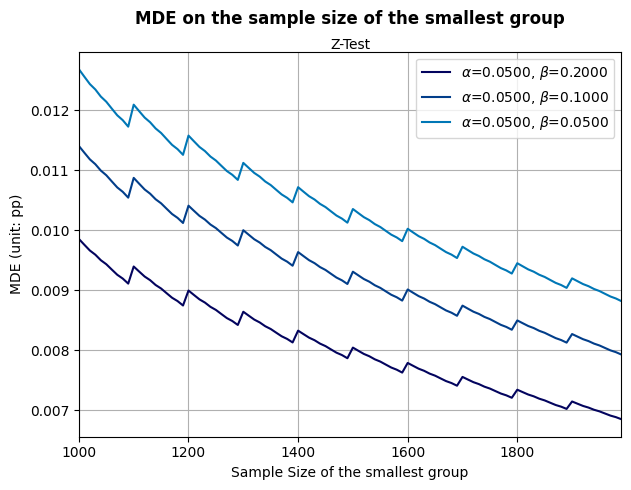

In [181]:
f, a, mde = plot_mde_prop_sample(prop=0.01, n_ratio=(20,80), n_min_range=(1000,2000), points=100)
f

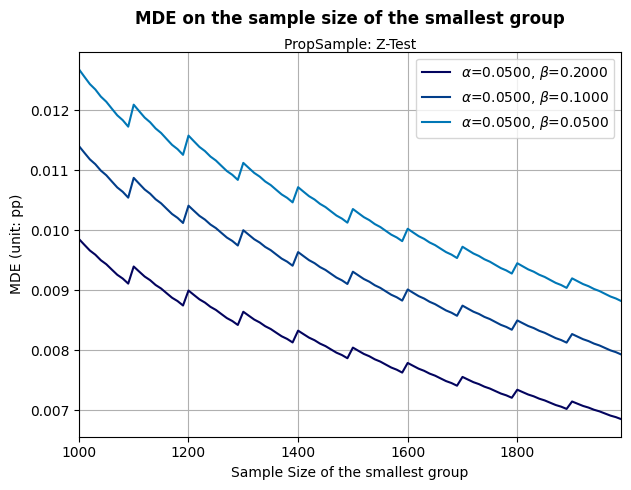

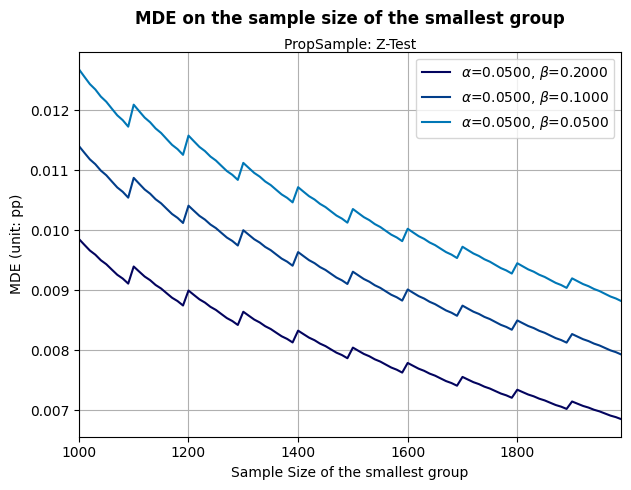

In [1]:
from abetter.io.plot import plot_mde_prop_sample
f, a, mde = plot_mde_prop_sample(prop=0.01, n_ratio=(20,80), n_min_range=(1000,2000), points=100)
f

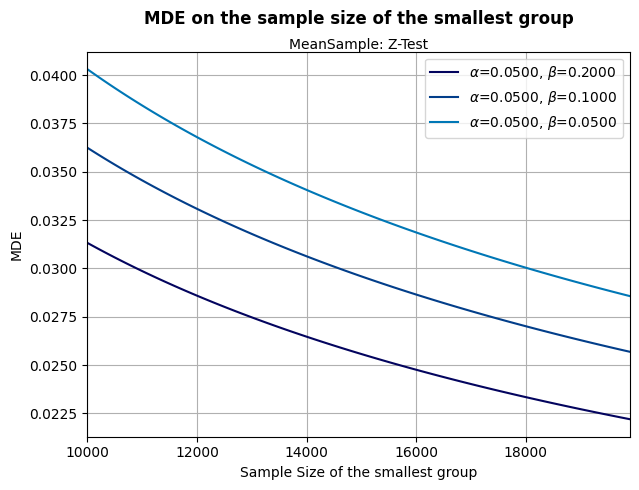

In [2]:
from abetter.io.plot import plot_mde_mean_sample
f, a, mde = plot_mde_mean_sample(std1=1, std2=1, n_ratio=(20,80), n_min_range=(10000,20000), test='z')
f